# Fine-tuning results

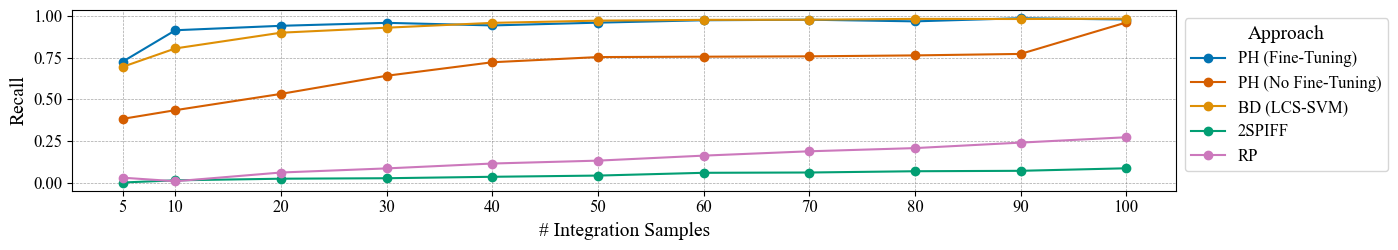

In [ ]:
# Retrieve all results.csv from the no{packer}/0 folders and merge them into a single file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

ml_tools_dict = {}

with open('../../experiments_others/packer_integration/results/results_lcs.pickle', 'rb') as f:
    ml_tools_dict['lcs'] = pickle.load(f)

with open('../../experiments_others/packer_integration/results/results_2spiff.pickle', 'rb') as f:
    ml_tools_dict['2spiff'] = pickle.load(f)

with open('../../experiments_others/packer_integration/results/results_randomness_profiles.pickle', 'rb') as f:
    ml_tools_dict['randomness_profiles'] = pickle.load(f)

ml_tools_res = {'lcs': pd.DataFrame(), '2spiff': pd.DataFrame(), 'randomness_profiles': pd.DataFrame()}
# {'packer': {n: {'recall_new_packer': x, 'accuracy': y}, ...}} calculate the average recall for each size
for tool, res in ml_tools_dict.items():
    for packer, packer_res in res.items():
        for n, n_res in packer_res.items():
            if n != 2:
                ml_tools_res[tool].loc[(n, packer)] = n_res['recall_new_packer']

for tool, res in ml_tools_res.items():
    ml_tools_res[tool]["recall"] = res.mean(axis=1)

# drop all columns except for recall
for tool, res in ml_tools_res.items():
    ml_tools_res[tool] = ml_tools_res[tool].drop(columns=[column for column in ml_tools_res[tool].columns if column != 'recall'])

packers = ['kkrunchy', 'mpress', 'obsidium', 'pecompact', 'pelock', 'petite', 'telock', 'themida', 'upx']
df_finetuning = pd.DataFrame()
df_nofinetuning = pd.DataFrame()

# load results from res.csv in each experiment
for packer in packers:
    for i in [5] + list(range(10, 110, 10)):
        new_finetuning = pd.read_csv(f"no{packer}/{i}/res.csv")
        new_finetuning['size'] = i
        df_finetuning = pd.concat([df_finetuning, new_finetuning])
        new_nofinetuning = pd.read_csv(f"no{packer}/0/{i}/res.csv")
        new_nofinetuning['size'] = i
        df_nofinetuning = pd.concat([df_nofinetuning, new_nofinetuning])

df_finetuning = df_finetuning[df_finetuning['approach'] == 'clustering']
df_finetuning = df_finetuning.drop(columns=['approach', 'samples_num', 'avg_num_instances'])
df_finetuning = df_finetuning.set_index('packer')
df_nofinetuning = df_nofinetuning[df_nofinetuning['approach'] == 'clustering']
df_nofinetuning = df_nofinetuning.drop(columns=['approach', 'samples_num', 'avg_num_instances'])
df_nofinetuning = df_nofinetuning.set_index('packer')

# calculate the average for each size
df_finetuning = df_finetuning.groupby(['size']).mean()
df_nofinetuning = df_nofinetuning.groupby(['size']).mean()

# plot the trand of the average

plt.rcParams["font.family"] = "Times new Roman"

# Create a color map
color_palette = sns.color_palette("colorblind", 5)

# Plot the average trend from 10 to 100 samples
plt.figure(figsize=(14, 2.6))

# from other ml tools add results

plt.plot(df_finetuning.index, df_finetuning['recall'], label='PH (Fine-Tuning)', color=color_palette[0], marker='o', linestyle='-', linewidth=1.5)
plt.plot(df_nofinetuning.index, df_nofinetuning['recall'], label='PH (No Fine-Tuning)', color=color_palette[3], marker='o', linestyle='-', linewidth=1.5)
plt.plot(ml_tools_res['lcs'].index, ml_tools_res['lcs']['recall'], label='BD (LCS-SVM)', color=color_palette[1], marker='o', linestyle='-', linewidth=1.5)
plt.plot(ml_tools_res['2spiff'].index, ml_tools_res['2spiff']['recall'], label='2SPIFF', color=color_palette[2], marker='o', linestyle='-', linewidth=1.5)
plt.plot(ml_tools_res['randomness_profiles'].index, ml_tools_res['randomness_profiles']['recall'], label='RP', color=color_palette[4], marker='o', linestyle='-', linewidth=1.5)
plt.legend(title='Approach', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=14)  # Adjust legend position as needed 
plt.xlabel('# Integration Samples', fontsize=14)
plt.ylabel('Recall', fontsize=14)  # General label for all metrics
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tick_params(labelsize=12)
plt.xticks(df_finetuning.index)

# Improve spacing between subplots (optional)
plt.tight_layout()

plt.savefig('', format='pdf')  # Uncomment to save the figure

# Show the plot
plt.show()

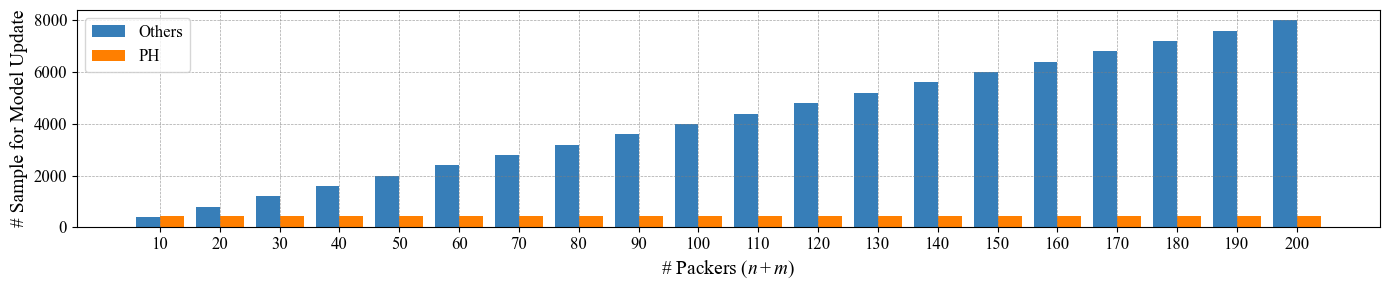

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_packers_added = 10
# Fixed number of samples per packer
N_samples_per_packer = 40

# Variable number of packers
N_packers = np.arange(n_packers_added, 201, 10)

# Computational cost
cost_retraining = N_packers * N_samples_per_packer
cost_finetuning = N_samples_per_packer * (np.ones_like(N_packers) + n_packers_added)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

# Plotting with improved visual appeal and colorblind-friendly colors
fig, ax = plt.subplots(figsize=(14, 3))

bar_width = 0.4
index = np.arange(len(N_packers))

bar1 = ax.bar(index, cost_retraining, bar_width, label='Others', color='#377eb8')
bar2 = ax.bar(index + bar_width, cost_finetuning, bar_width, label='PH', color='#ff7f00')

ax.set_xlabel('# Packers ($n + m$)', fontsize=14)
ax.set_ylabel('# Sample for Model Update', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(N_packers, fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('', format='pdf')  # Uncomment to save the figure
plt.show()




In [20]:
df_finetuning

,recall
size,
5,0.725556
10,0.914444
20,0.941111
30,0.958889
40,0.943333
50,0.960000
60,0.974444
70,0.977778
80,0.967778
